# Exploratory Data Analysis

In [3]:
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

# Import of fundamental libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
%matplotlib inline

In [4]:
train = pd.read_csv('train.csv',index_col=0)
test = pd.read_csv('test.csv',index_col=0)

In [5]:
print(f'Train dataset: {train.shape[0]} rows and {train.shape[1]} columns')
print(f'Test dataset:  {test.shape[0]} rows and {test.shape[1]} columns')

Train dataset: 1460 rows and 80 columns
Test dataset:  1459 rows and 79 columns


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
# A huge mix of categorical (nominal and ordinal) with numerical (discrete and continuos) features.
# We will split them and apply some EDA seperately
from sklearn.compose import make_column_selector as selector

#####################
# All numerical features
####################
num_cols = selector(dtype_exclude=['object','category'])
num_cols = num_cols(train)
num_cols.remove('MSSubClass')
num_cols.remove('SalePrice')

####################################
# Numerical features: Discrete (disc)
####################################
disc = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

################################
# Numerical features: Continuous
###############################
cont = []
for i in num_cols:
    if i not in disc:
        cont.append(i)

######################
# All categorical features
#####################
cat_cols = selector(dtype_include=['object','category'])
cat_cols = cat_cols(train)
cat_cols = cat_cols + ['MSSubClass']

#################
# Ordinal 
#################
ordi = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond','PoolQC', 'Fence']

# Nominal
nomi = []
for i in cat_cols:
    if i not in ordi:
        nomi.append(i)

## Univariate EDA

### Numeric features: continuous variables

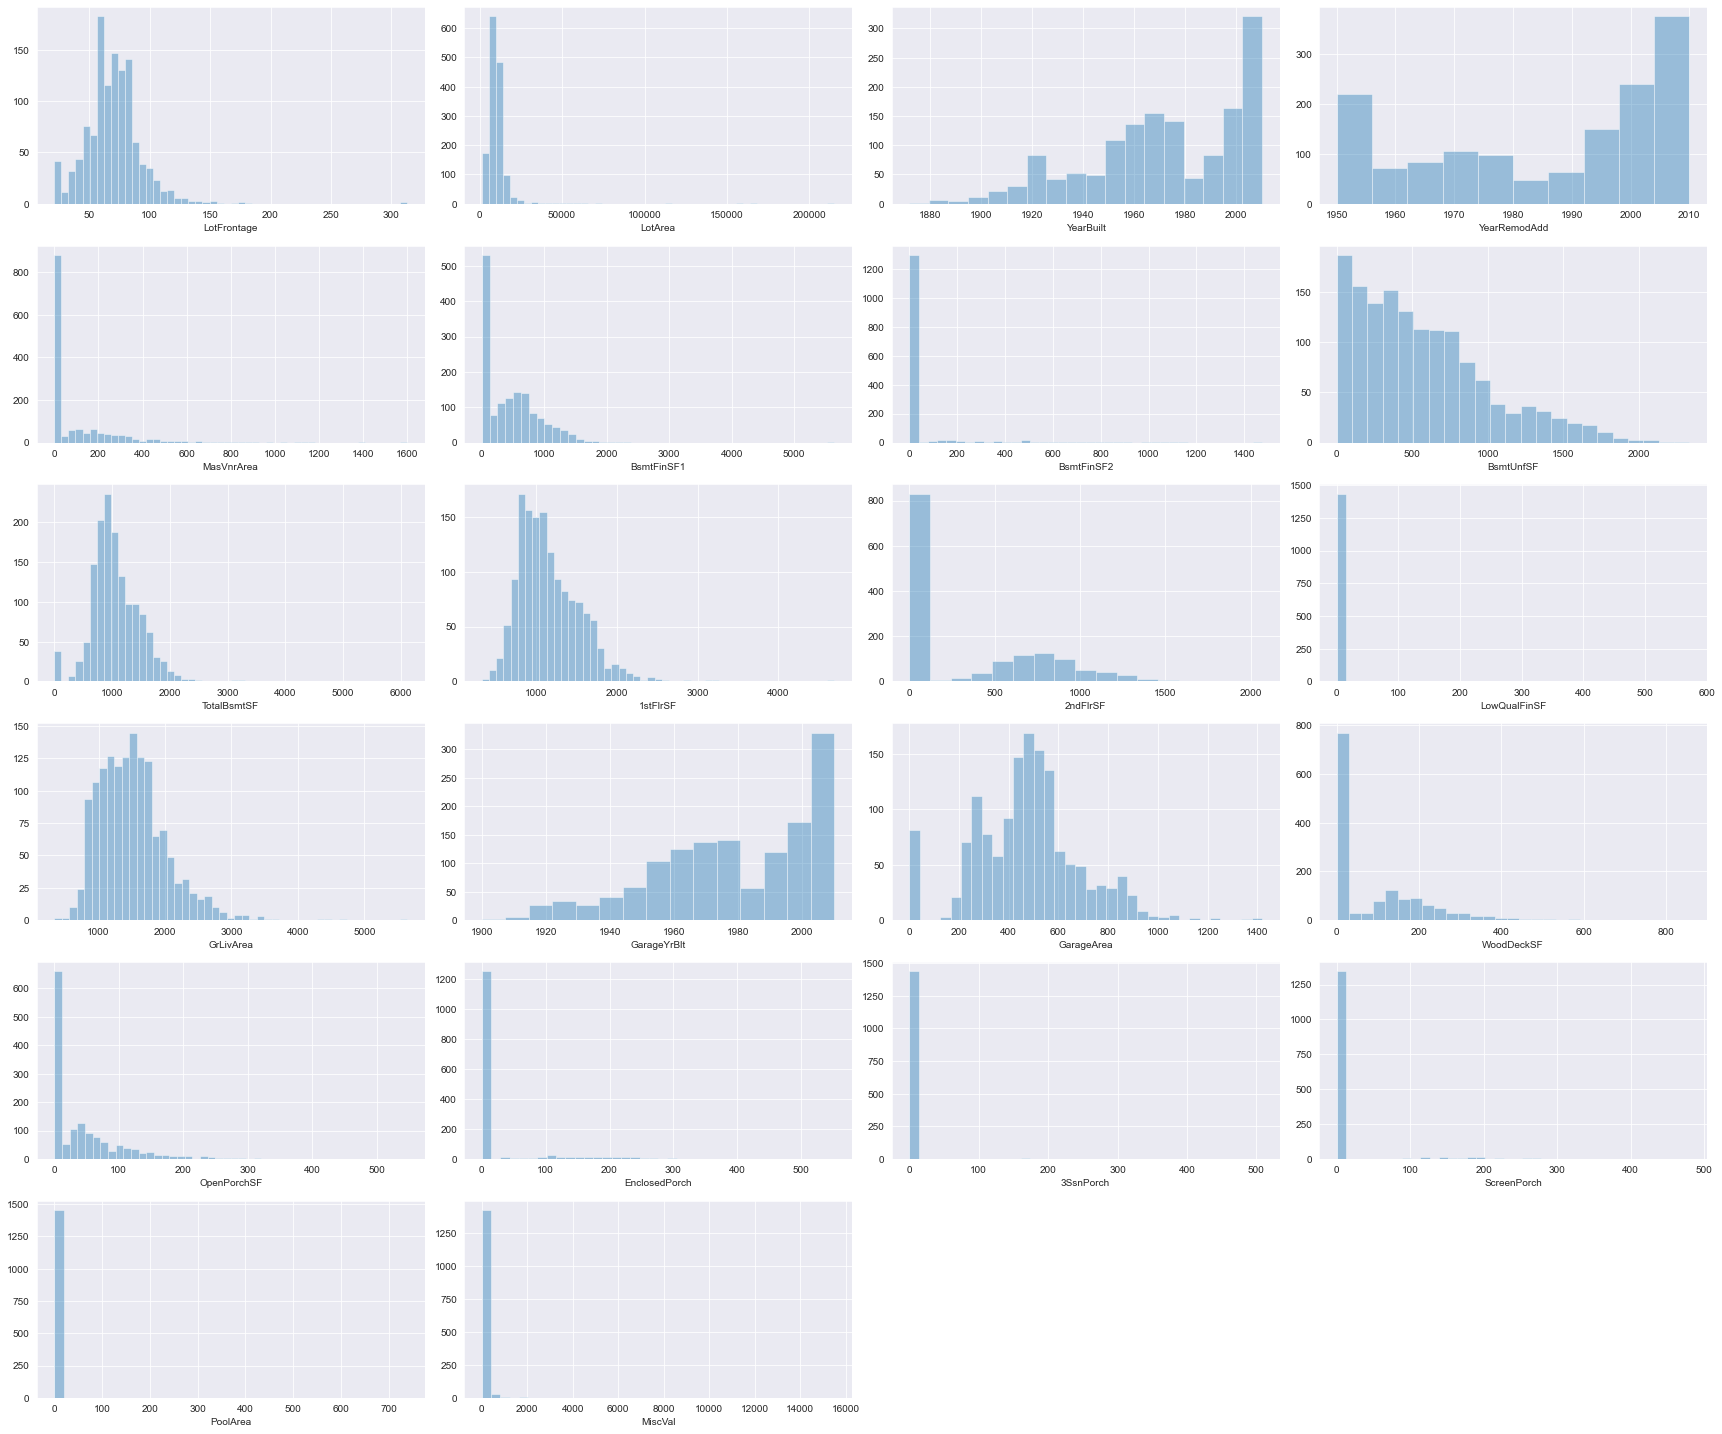

In [8]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(24,20))
for index, col in enumerate(cont):
    plt.subplot(6,4,index+1)
    sns.distplot(train.loc[:,col].dropna(),kde=False)
fig.tight_layout(pad=1.0)
sns.set_context('paper',font_scale=1.5)

### Numeric features: discrete variables

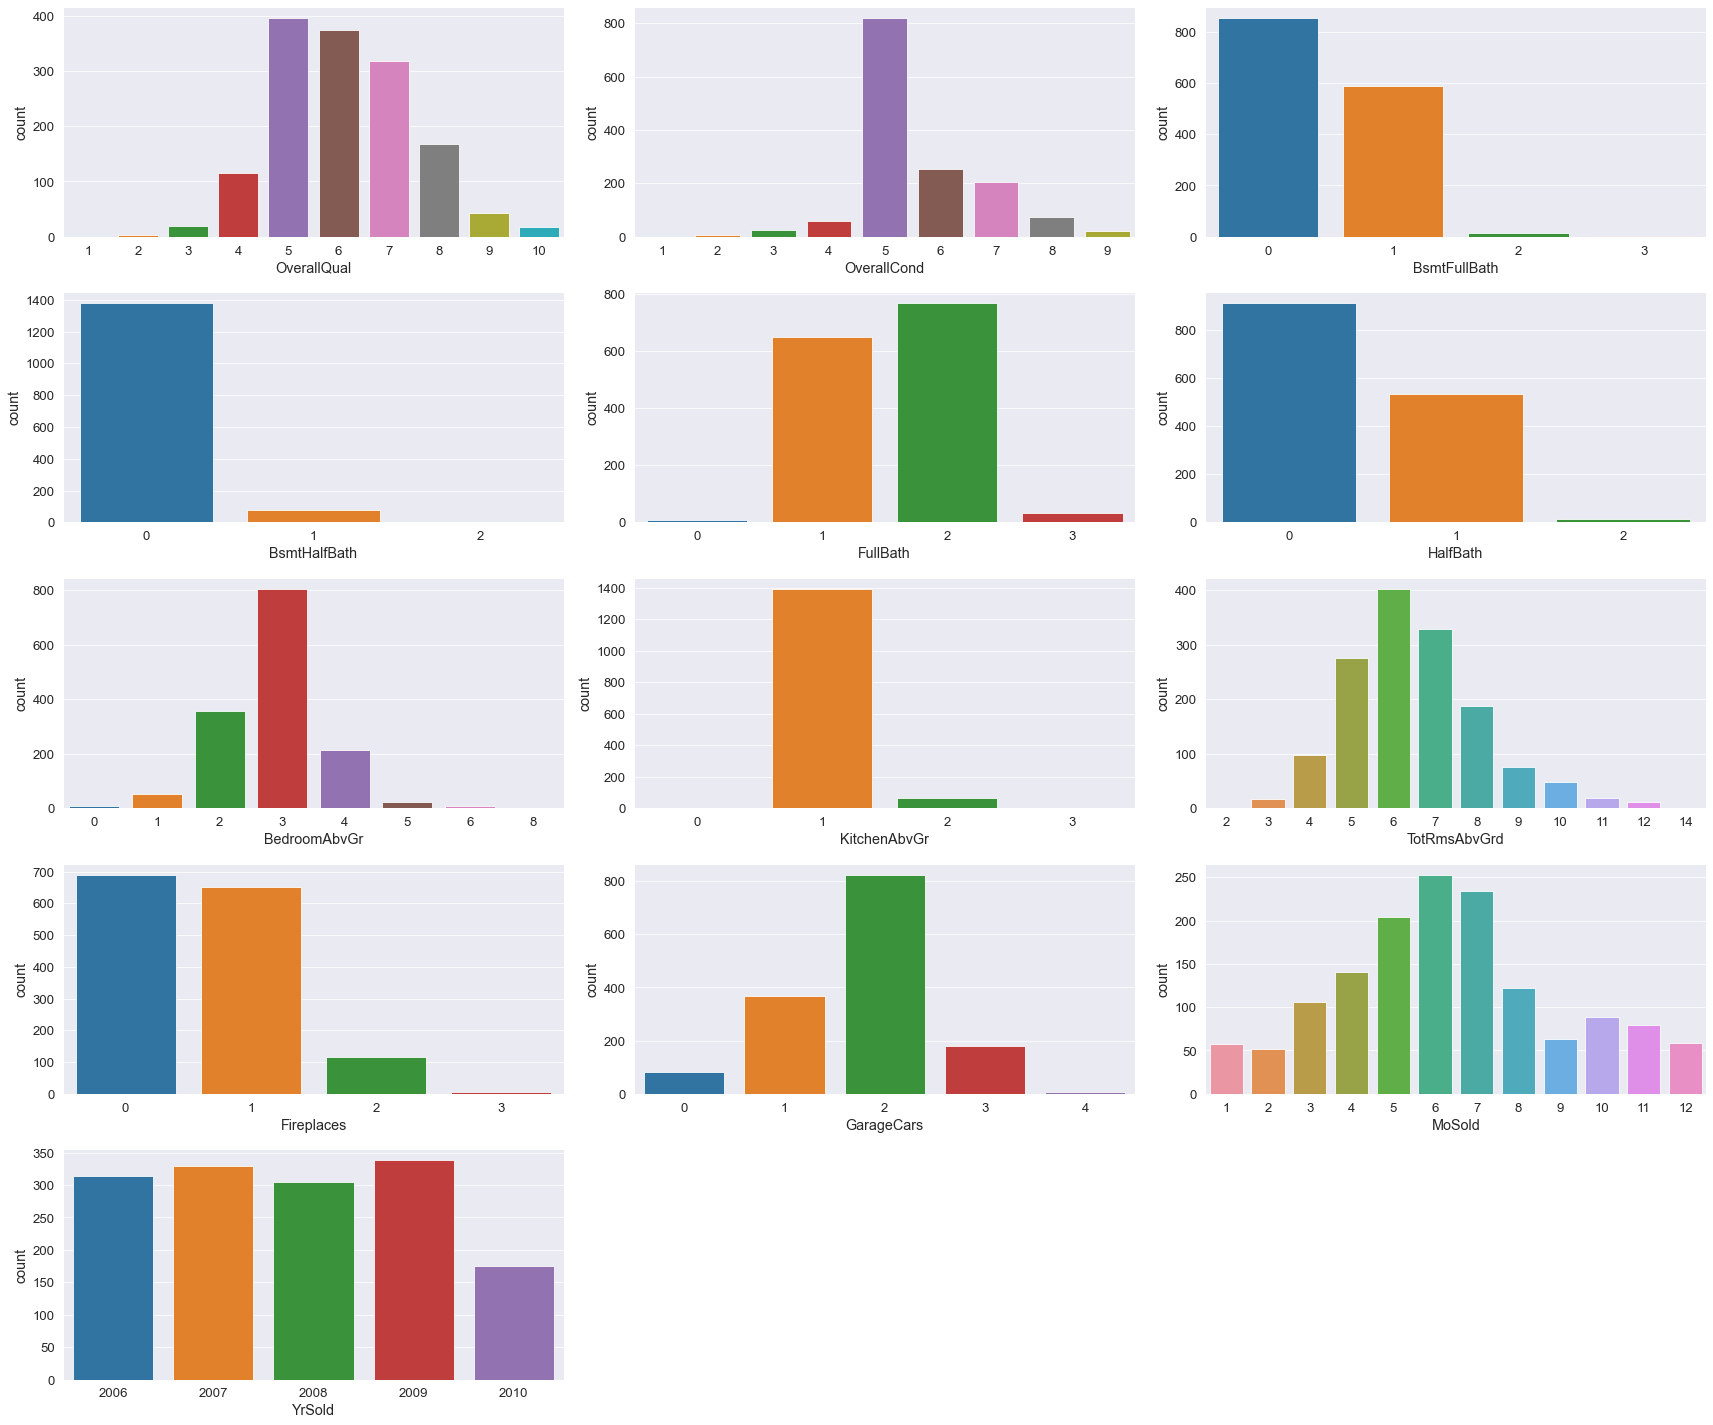

In [9]:
sns.set_context('paper',font_scale=1.5)
fig = plt.figure(figsize=(24,20))
for index,col in enumerate(disc):
    plt.subplot(5,3,index+1)
    sns.countplot(x=col, data=train)
fig.tight_layout(pad=1.0)

### Categorical features: nominal variables

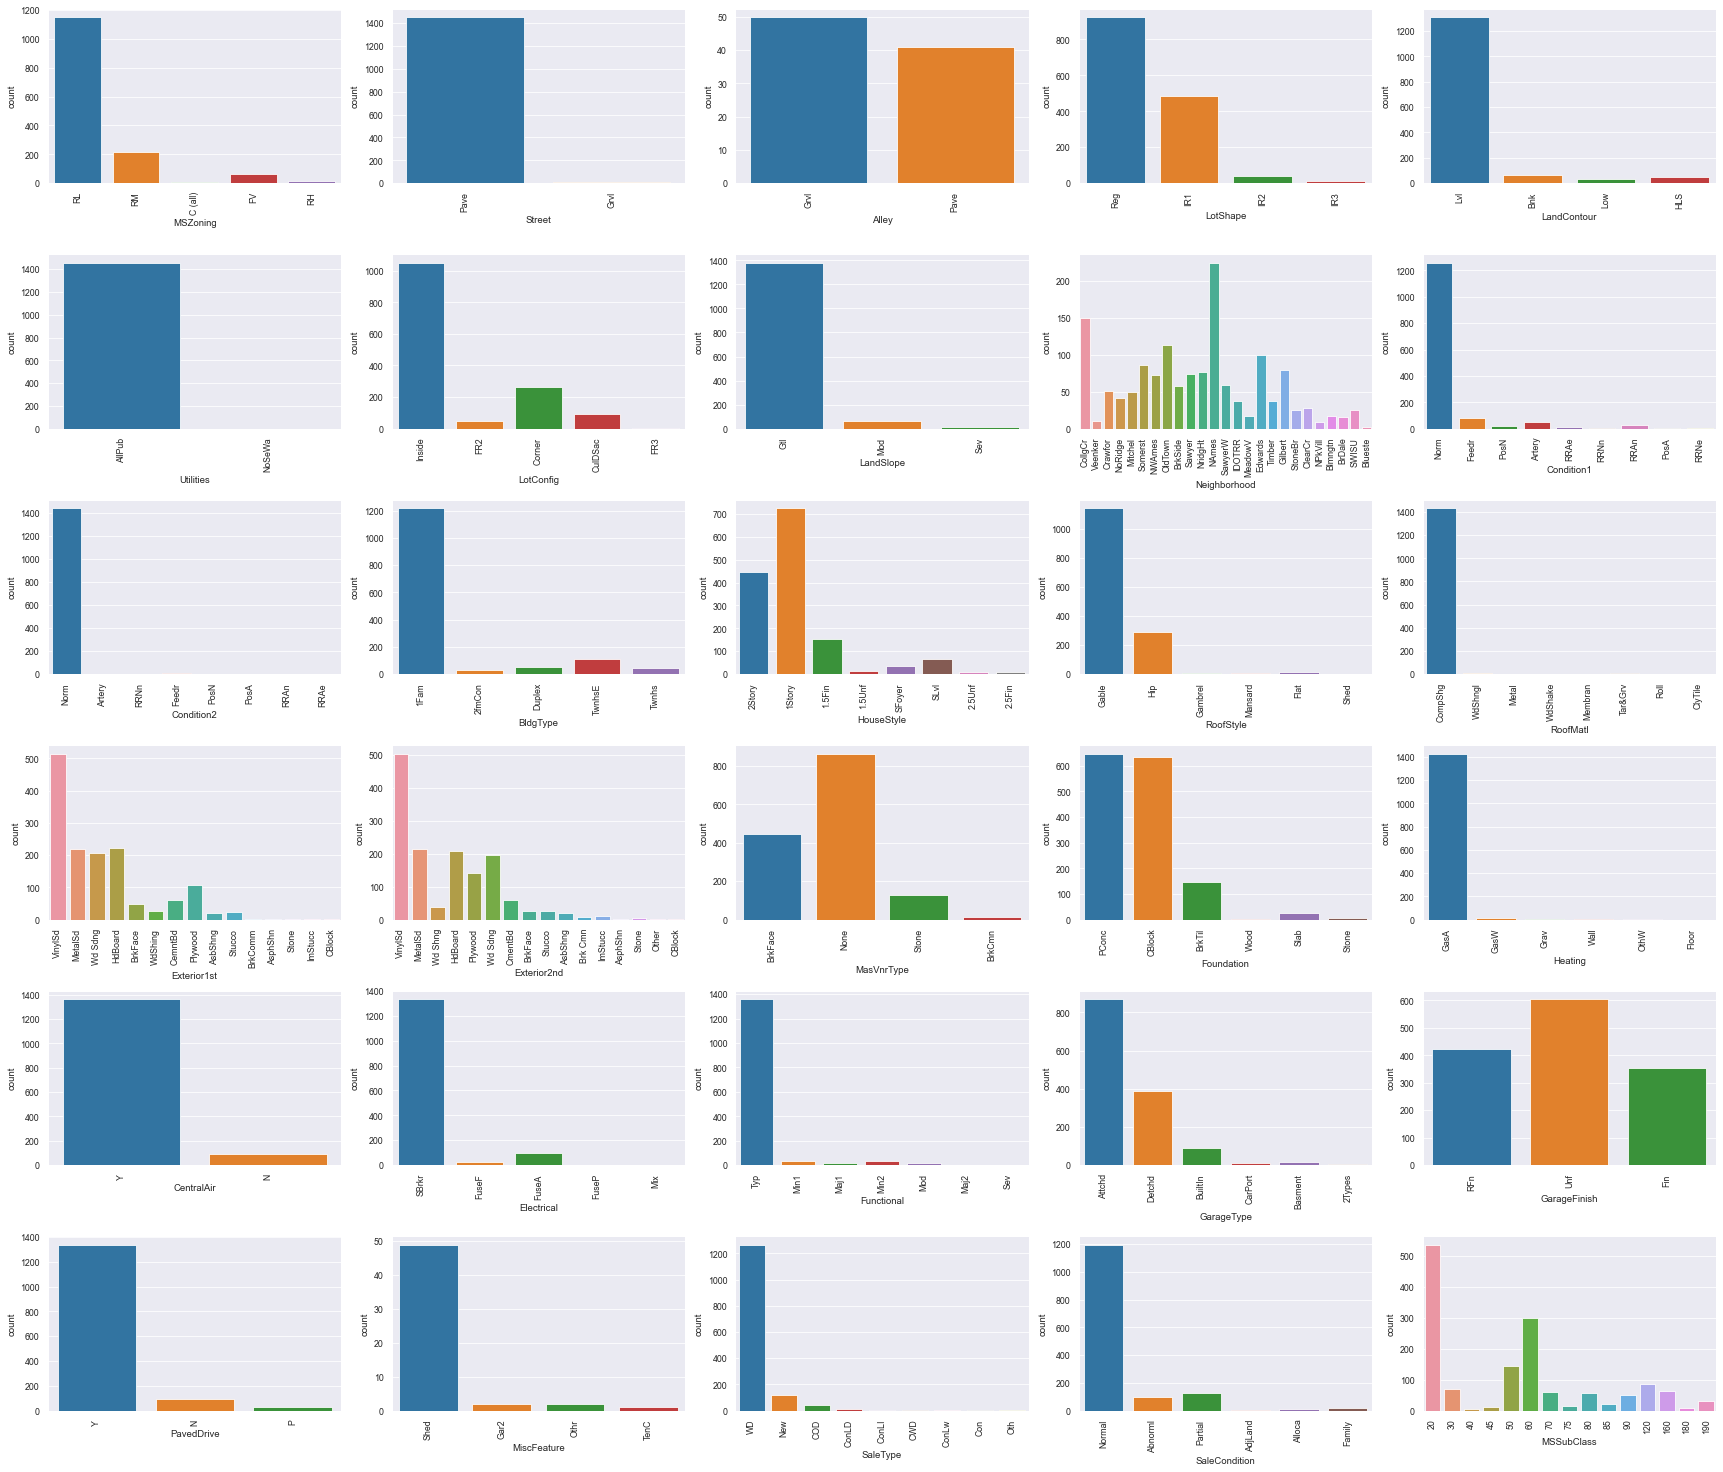

In [10]:
sns.set_context('paper',font_scale=1)
fig = plt.figure(figsize=(24,30))
for index,col in enumerate(nomi):
    plt.subplot(9,5,index+1)
    sns.countplot(x=col, data=train[nomi])
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

### Categorical features: ordinal variables

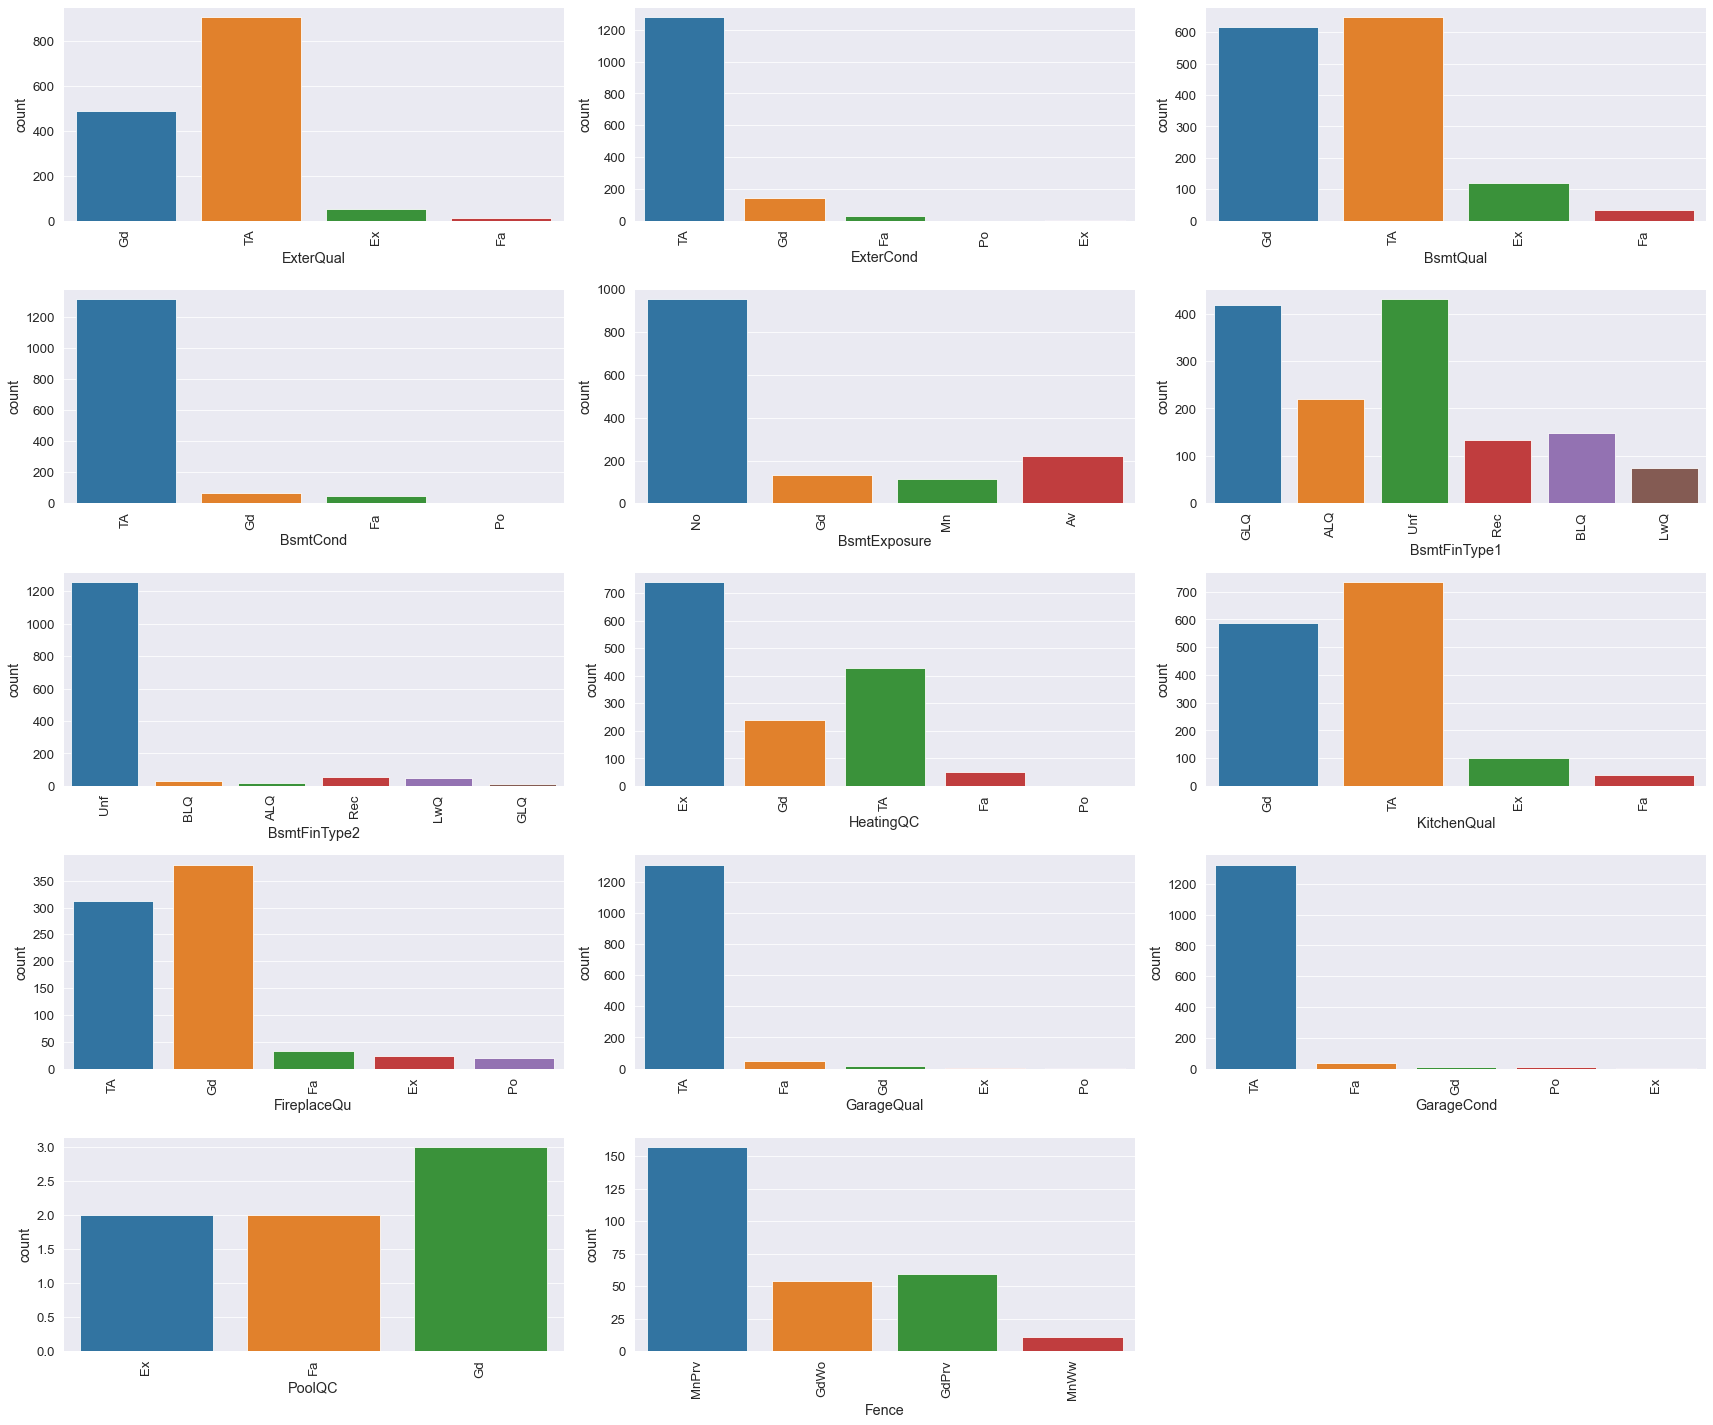

In [11]:
sns.set_context('paper',font_scale=1.5)
fig = plt.figure(figsize=(24,20))
for index,col in enumerate(ordi):
    plt.subplot(5,3,index+1)
    sns.countplot(x=col, data=train[ordi])
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

## Bi-variate EDA: features vs target

### Numeric features: continuous variables

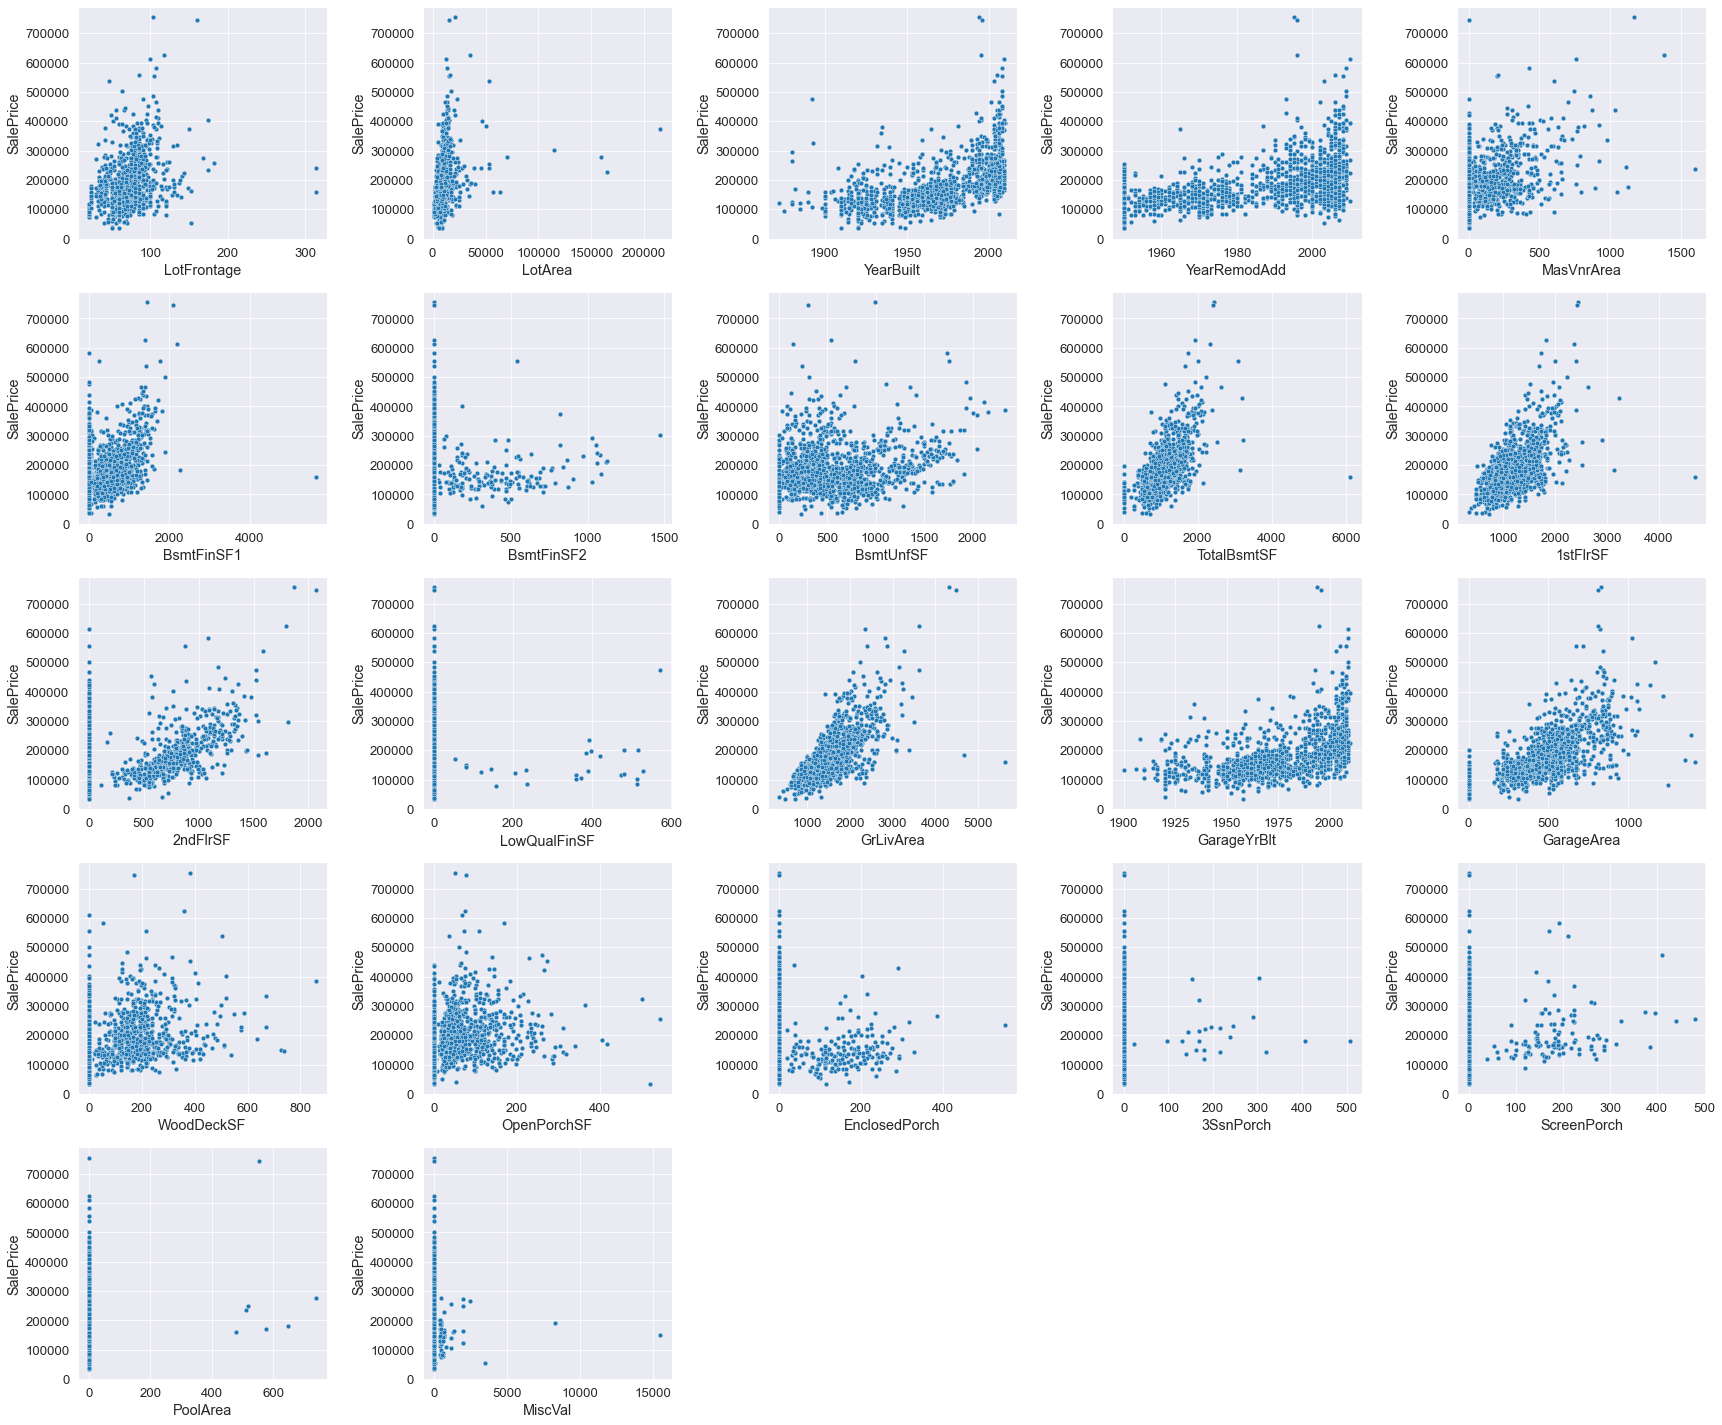

In [12]:
# Numerical continuious columns vs the SalePrice
sns.set_context('paper',font_scale=1.5)
fig = plt.figure(figsize=(24,20))
for index in range(len(cont)):
    plt.subplot(5,5,index+1)
    sns.scatterplot(x=train[cont].iloc[:,index],
                    y=train['SalePrice'],
                    data=train)
fig.tight_layout(pad=1.0)

### Numeric features: discrete features

In [13]:
disc_S = disc + ['SalePrice']

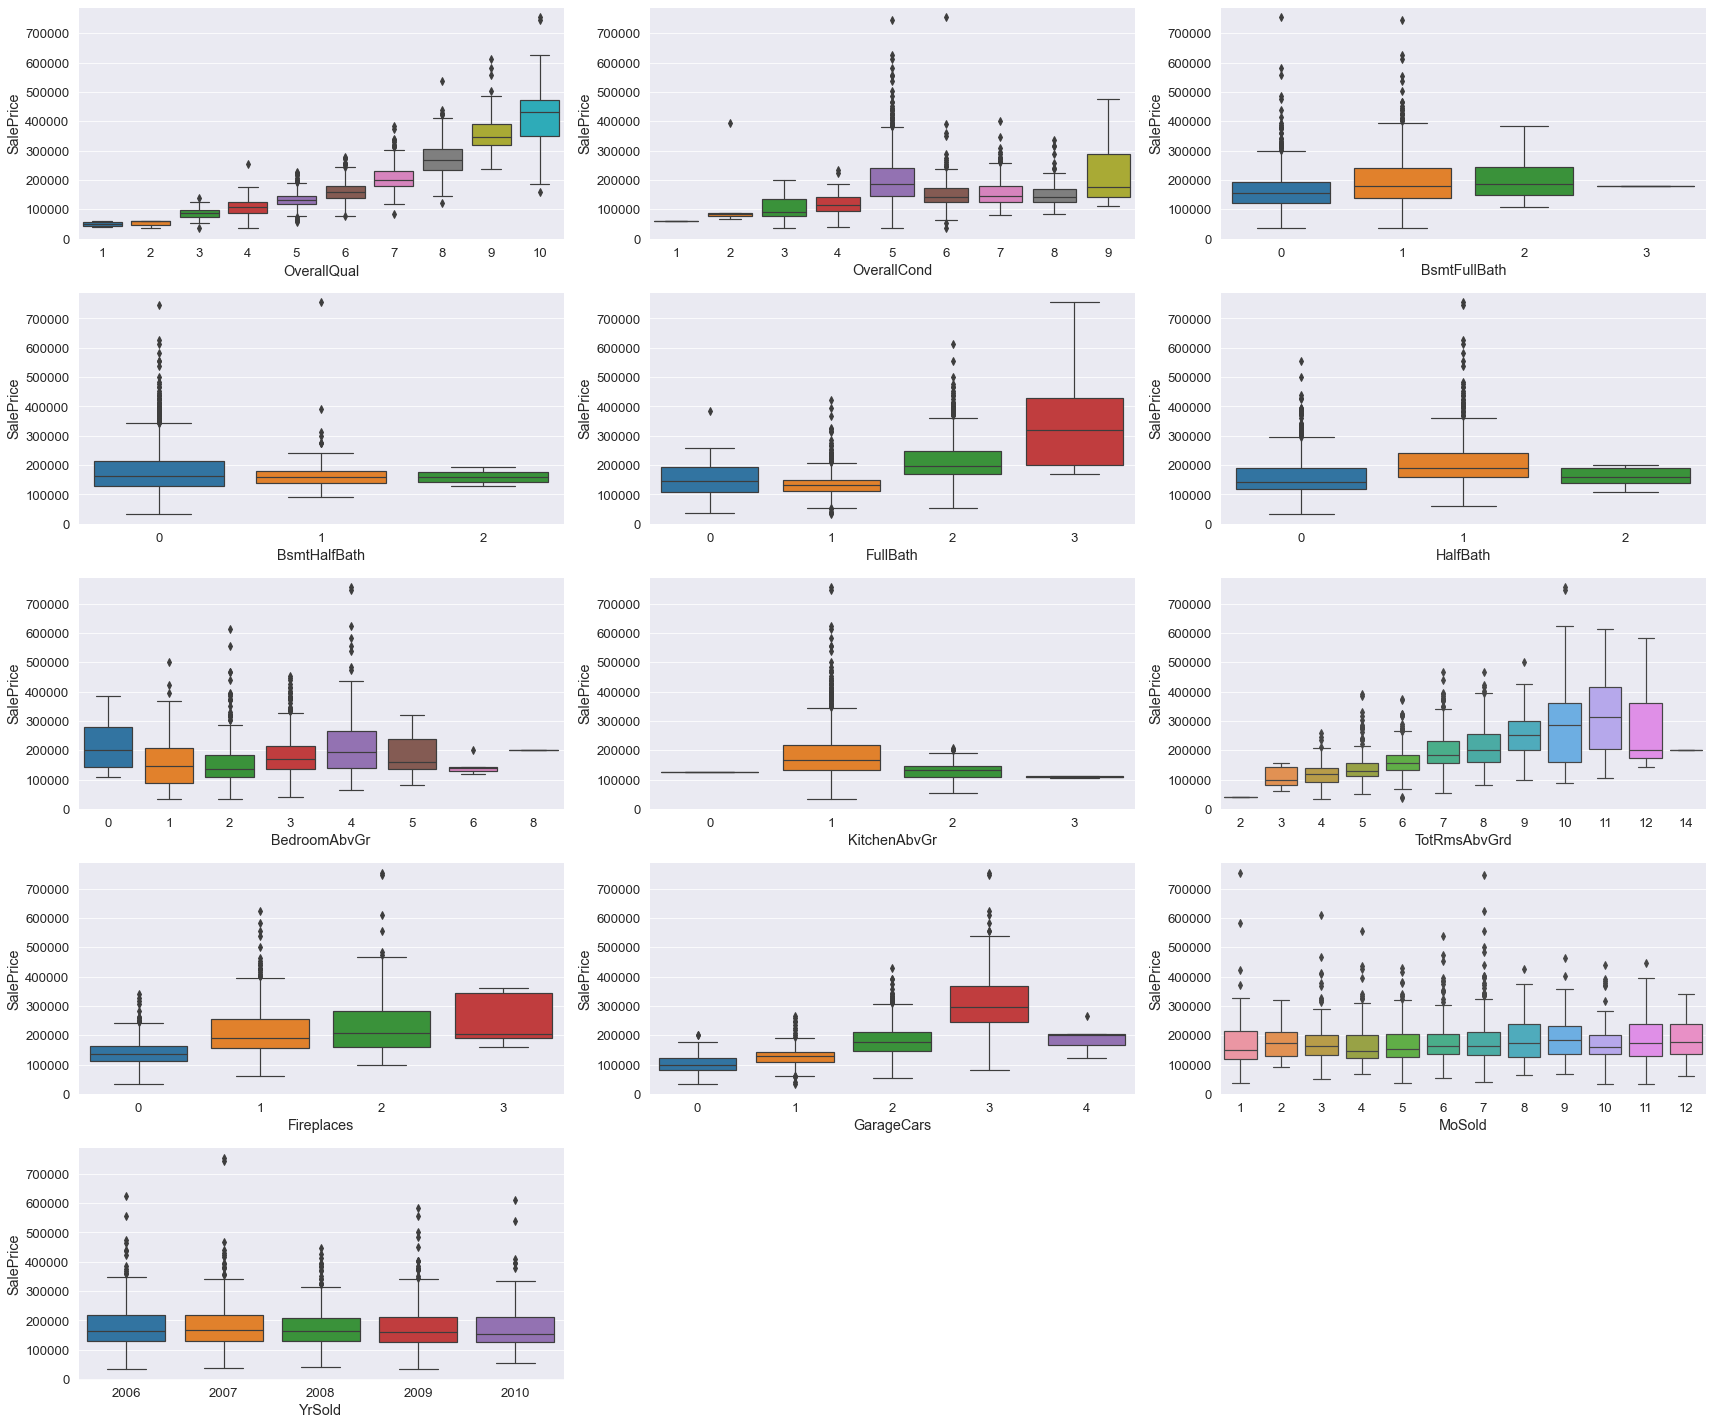

In [14]:
sns.set_context('paper',font_scale=1.5)
fig = plt.figure(figsize=(24,20))
for index,col in enumerate(disc):
    plt.subplot(5,3,index+1)
    sns.boxplot(x=col,y='SalePrice',data=train[disc_S])
    #plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

### Categorical features: nominal variables

In [15]:
nomi_S = nomi + ['SalePrice']

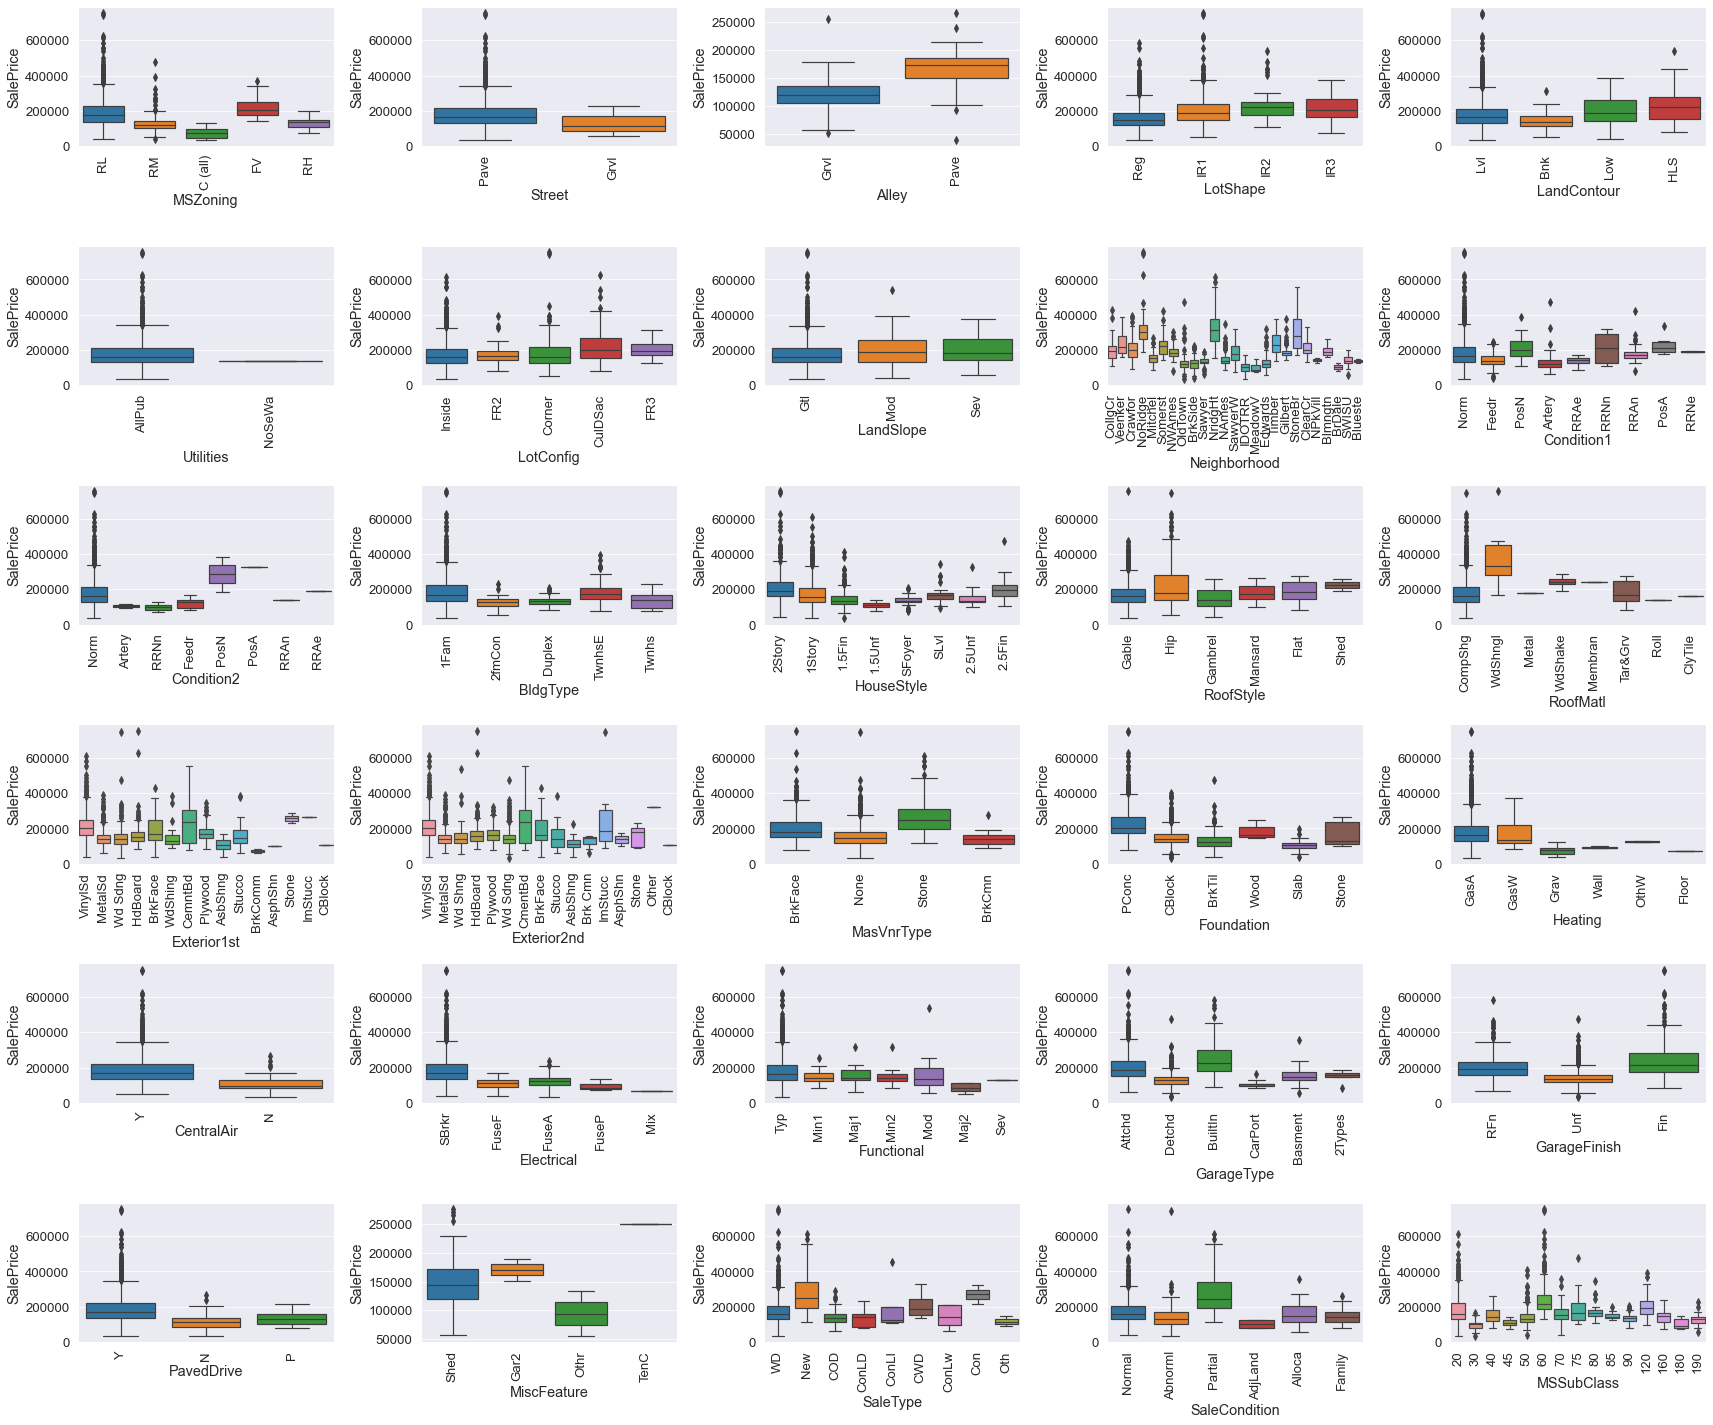

In [16]:
sns.set_context('paper',font_scale=1.5)
fig = plt.figure(figsize=(24,20))
for index,col in enumerate(nomi):
    plt.subplot(6,5,index+1)
    sns.boxplot(x=col,y='SalePrice',data=train[nomi_S])
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

### Categorical features: ordinal variables

In [17]:
ordi_S = ordi + ['SalePrice']

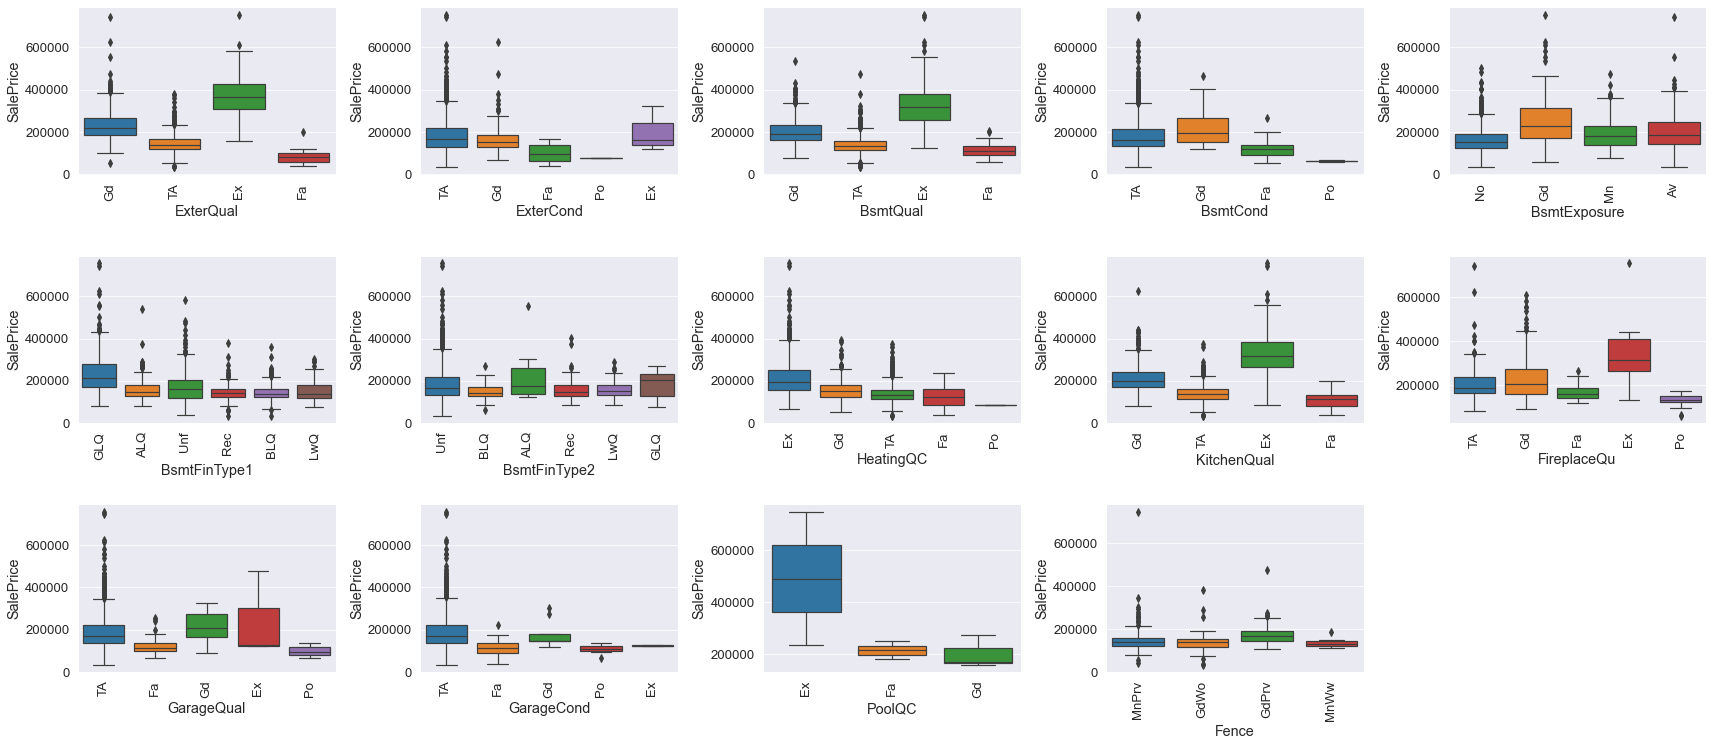

In [18]:
sns.set_context('paper',font_scale=1.5)
fig = plt.figure(figsize=(24,20))
for index,col in enumerate(ordi):
    plt.subplot(6,5,index+1)
    sns.boxplot(x=col,y='SalePrice',data=train[ordi_S])
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

## Correlation matrix

### Multicollinearity in Nominal variables

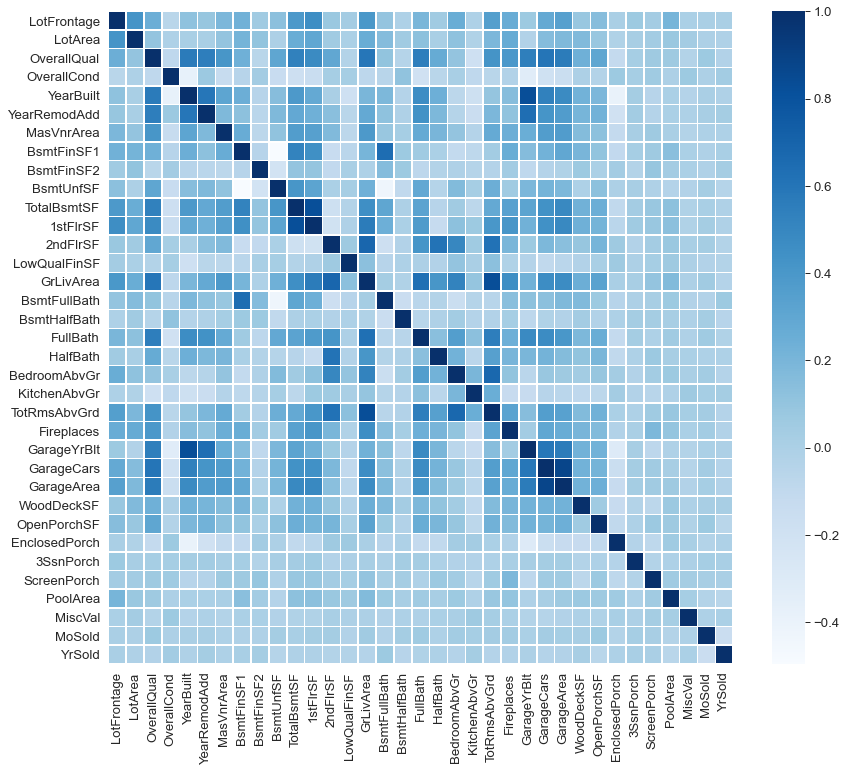

In [19]:
# Checking for multicollinearity within numerical columns
# (keep in mind correlation and causation are different things)

plt.figure(figsize=(14,12))
num_correlation = train[num_cols].corr()
sns.set_style('darkgrid')
sns.heatmap(num_correlation, 
            #mask = num_correlation < 0.8,
            linewidth=0.5,
            cmap='Blues');

In [20]:
t1 = num_correlation.abs().unstack().drop_duplicates().sort_values(ascending=False)

In [21]:
t1[(t1< 1) & (t1 > 0.8)]

GarageCars   GarageArea      0.882475
YearBuilt    GarageYrBlt     0.825667
GrLivArea    TotRmsAbvGrd    0.825489
TotalBsmtSF  1stFlrSF        0.819530
dtype: float64

### Correlation with target feature

In [22]:
# Investigating correlation between numerical features and the target (SalePrice)
num_cols_S = num_cols + ['SalePrice']
correlation = train[num_cols_S].corr()
c1 = correlation[['SalePrice']].sort_values(['SalePrice'],ascending=False)

In [23]:
c1

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
